In [1]:
%matplotlib inline

In [2]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete = load_umachine_sdss_with_meert15()
no_data_mask = np.isnan(full_sdss['Magr_tot_meert15'])

mask = ~no_data_mask & behroozi_complete
sdss = full_sdss[mask]

from galsize_models.models.kravtsov13 import halo_radius_vs_stellar_mass
sdss['rvir_halo_kpc'] = halo_radius_vs_stellar_mass(10**sdss['sm'])

print(sdss.keys())
print("\nNumber of galaxies in complete sample = {0}".format(len(sdss)))


['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'ssfr', 'rvir_halo_kpc']

Number of galaxies in complete sample = 229889


In [3]:
from galsize_models.models.load_baseline_catalogs import load_umachine_mock
mock = load_umachine_mock()
mock['ssfr'] = np.log10(mock['sfr']/mock['sm'])

Total runtime = 29.05 seconds


In [4]:
from galsize_models.models.random_bt_assignment import assign_random_bt

logsm_mock, ssfr_mock = np.log10(mock['obs_sm']), mock['ssfr']
logsm_data, ssfr_data, bt_data = sdss['sm'], sdss['ssfr'], sdss['bulge_to_total_rband_meert15']
mock['bulge_to_total_rband_meert15'] = assign_random_bt(logsm_mock, ssfr_mock, logsm_data, ssfr_data, bt_data)
print(mock.keys())

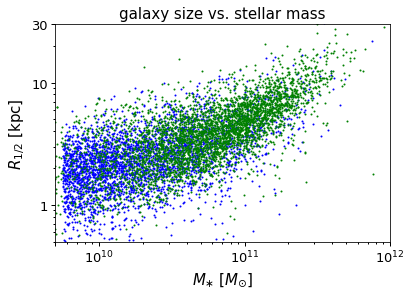

In [9]:
from halotools.empirical_models import halo_mass_to_halo_radius
from astropy.cosmology import Planck15 
redshift = 1./mock['a_first_infall'] - 1.
mock['rvir_halo_kpc'] = halo_mass_to_halo_radius(mock['mpeak']*Planck15.h, Planck15, redshift, 'vir')*1000./Planck15.h

from galsize_models.models.kravtsov13 import galaxy_radius_vs_stellar_mass_power_law
from galsize_models.models.kravtsov13 import galaxy_radius_vs_halo_radius_power_law

norm_all, index_all = 0.01, 1

mock['r50_magr_kpc_meert15'] = galaxy_radius_vs_halo_radius_power_law(mock['rvir_halo_kpc'], norm_all, index_all)
mock['r50_with_scatter'] = 10**(np.random.normal(loc=np.log10(mock['r50_magr_kpc_meert15']), scale=0.15))


fig, ax = plt.subplots(1, 1)
__=ax.loglog()

nskip = 50
__=ax.scatter(mock['obs_sm'][::2*nskip], mock['r50_with_scatter'][::2*nskip], s=1, color='blue')
__=ax.scatter(10**sdss['sm'][::nskip], sdss['r50_magr_kpc_meert15'][::nskip], s=1, color='green')


xlim = ax.set_xlim(5e9, 1e12)
ylim = ax.set_ylim(0.5, 30)
__=ax.set_xticks((5e9, 1e10, 1e11, 1e12))
__=ax.set_yticks((1, 10, 30))
from matplotlib import ticker
__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel = ax.set_xlabel(r'$M_{\ast}$ [$M_{\odot}$]')
ylabel = ax.set_ylabel(r'$R_{1/2}$ [kpc]')
title = ax.set_title('galaxy size vs. stellar mass')


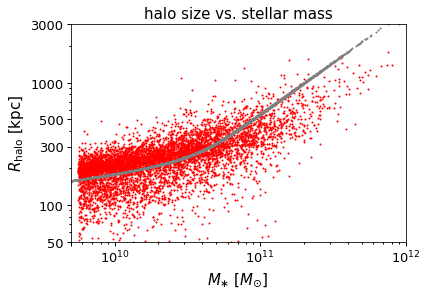

In [10]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

nskip = 50
__=ax.scatter(mock['obs_sm'][::nskip], mock['rvir_halo_kpc'][::nskip], s=1, color='red')
__=ax.scatter(10**sdss['sm'][::nskip], sdss['rvir_halo_kpc'][::nskip], s=1, color='gray')


xlim = ax.set_xlim(5e9, 1e12)
ylim = ax.set_ylim(50, 3000)
__=ax.set_xticks((5e9, 1e10, 1e11, 1e12))
__=ax.set_yticks((50, 100, 300, 500, 1000, 3000))
from matplotlib import ticker
__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel = ax.set_xlabel(r'$M_{\ast}$ [$M_{\odot}$]')
ylabel = ax.set_ylabel(r'$R_{\rm halo}$ [kpc]')
title = ax.set_title('halo size vs. stellar mass')
